In [70]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [43]:
import riskModelPercept as model
import WeiPerception as wei

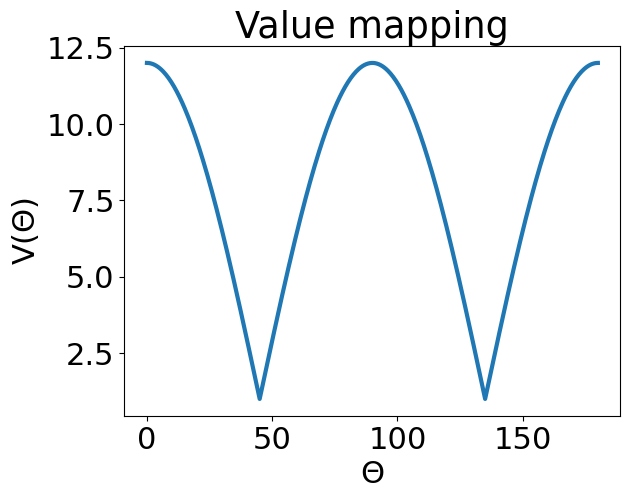

In [44]:
plt.plot(model.stim_grid*90./np.pi, model.value_function_ori(model.stim_grid, "curvedPrior"))
plt.xlabel('$\Theta$')
plt.ylabel('V($\Theta$)')
plt.title('Value mapping')

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")
# plt.plot(model.stim_grid*90./np.pi, model.value_function_ori(model.stim_grid, "inversePrior"))

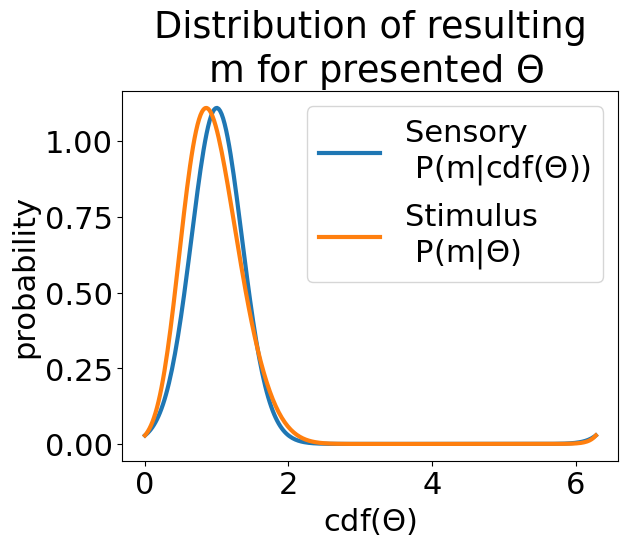

In [45]:
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.rep_grid), label = "Sensory\n P(m|cdf($\Theta$))")
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.cdf(model.rep_grid, model.rep_grid)), label = "Stimulus\n P(m|$\Theta$)")


plt.xlabel('cdf($\Theta$)')
plt.ylabel('probability')
plt.title('Distribution of resulting\n m for presented $\Theta$')
plt.legend()

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

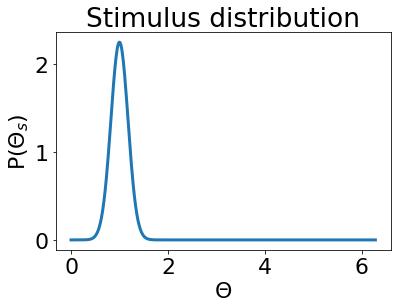

In [222]:
plt.plot(model.stim_grid,model.stimulus_noise(1.0, 32,model.stim_grid))
# plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.cdf(model.rep_grid, model.rep_grid)), label = "Stimulus P(m|cdf($\Theta_0$))")


plt.xlabel('$\Theta$')
plt.ylabel('P($\Theta_s$)')
plt.title('Stimulus distribution')
# plt.legend()

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

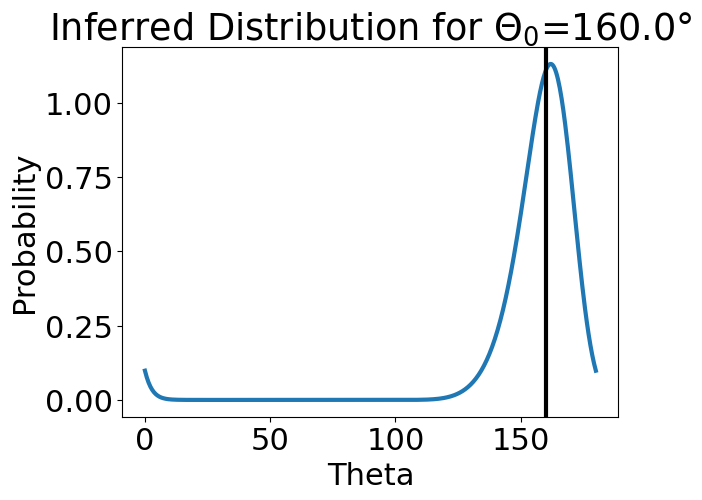

In [48]:
theta0 =  160./90.*np.pi
kappa_s = 10000
kappa_r = 16

np.shape(model.bayesian_decoding(theta0, kappa_s, kappa_r, normalize = False))

# sns.set_context('talk')
# plt.rcParams['font.size'] = 22

plt.plot(model.stim_grid/np.pi*90., model.bayesian_decoding(theta0, kappa_s, kappa_r, normalize = False)[0])

plt.axvline(theta0*90./np.pi, c = 'k')

plt.xlabel('Theta')
plt.ylabel('Probability')
plt.title('Inferred Distribution for $\Theta_0$=' + str(theta0/np.pi*90.)+'°')

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")



In [50]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

Text(0.5, 1.0, 'Wei : Bias -\n Varying stimulus noise')

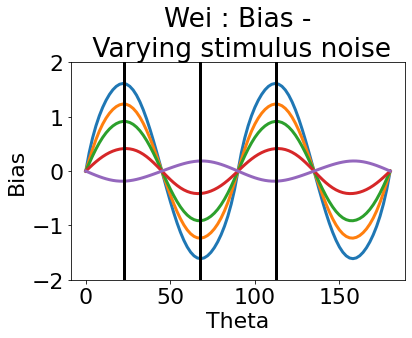

In [12]:
# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')



In [39]:

y = model.stim_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi


Text(0, 0.5, 'bias')

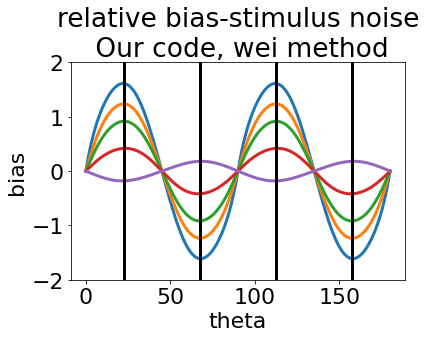

In [40]:
# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

Text(0, 0.5, 'Mean bias')

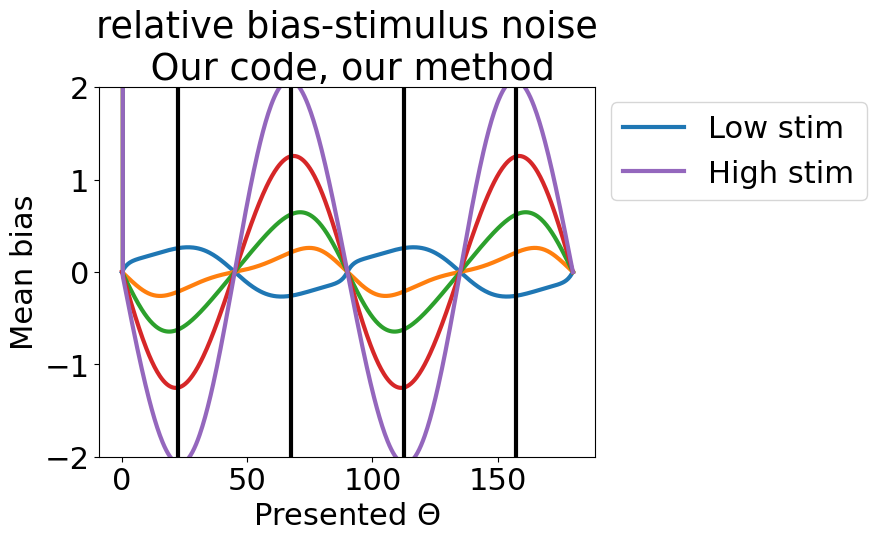

In [27]:
theta0 = np.linspace(0.00, 2.0*np.pi, 500) #0.8
# theta0 = theta0[:-1]

kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4

kappa =64



# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa3, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa4, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa5, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "High stim")




plt.ylim(-2,2)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [79]:
high_stim_noise = 2
low_stim_noise = 1000
high_rep_noise = 2
low_rep_noise = 8

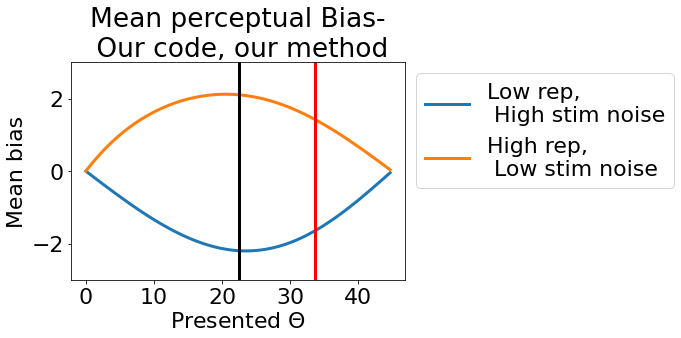

In [135]:
theta0 = np.linspace(0.00, 2.0*np.pi, 500) #0.8
# theta0 = theta0[:-1]


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_rep_noise, normalize = False)
plt.plot(theta0[0:125]*90./np.pi, (E_theta_given_theta0 - theta0)[0:125]*90./np.pi, label = "Low rep, \n High stim noise")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, high_rep_noise, normalize = False)
plt.plot(theta0[0:125]*90./np.pi, (E_theta_given_theta0 - theta0)[0:125]*90./np.pi, label = "High rep, \n Low stim noise")



plt.ylim(-3,3)

plt.axvline(22.5, c='k')
# plt.axvline(11.25, c='k')
plt.axvline(33.75, c='r')

# plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('Mean perceptual Bias-\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

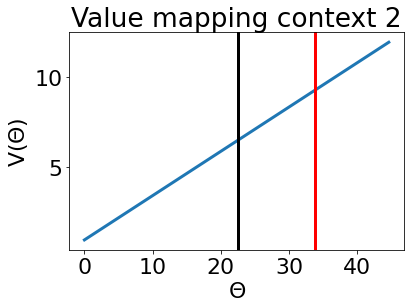

In [134]:
plt.plot(model.stim_grid[0:125]*90./np.pi,model.value_function_ori(model.stim_grid, type = "inverseLinearPrior")[0:125])

plt.axvline(22.5, c='k')
# plt.axvline(11.25, c='k')
plt.axvline(33.75, c='r')

plt.title('Value mapping context 2')
plt.xlabel("$\Theta$")
plt.ylabel("V($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [55]:
# iF THE RISKY ATTITUDES Came directly from the mean perceptual bias from above, then we would get things from below.
# However, risk attitudes are mean of value distribution comparison and not the mapped value comparisons of mean 
# perceptual distributions. We anyways do tyhe following for exercise.

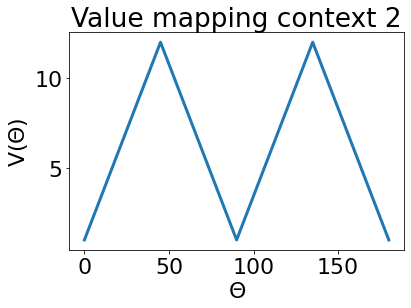

In [87]:
plt.plot(model.stim_grid*90./np.pi,model.value_function_ori(model.stim_grid, type = "inverseLinearPrior"))

plt.title('Value mapping context 2')
plt.xlabel("$\Theta$")
plt.ylabel("V($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [11]:
## Gifs

In [51]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [52]:
# Sensory encodings throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

kappa_s = high_stim_noise
kappa_r =  low_rep_noise
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.rep_grid, (model.MI_efficient_encoding(theta0 ,kappa_s, kappa_r)[0][0,...]))
    plt.title("$\Theta_0$ = %02d° in high stim and low rep noise" %(theta0*180/np.pi))
#     plt.ylim((0,350))
    plt.xlabel("Neural firing rate (representation)")
    plt.ylabel("Representation distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [52]:
# Bayesian decodings throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180/np.pi, (model.bayesian_decoding(theta0 ,kappa_s, kappa_r))[0, ...])
    mean_post = model.expected_thetahat_theta0(theta0, kappa_s, kappa_r)
    
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %.2f°'%((theta0*180.)/np.pi))
    plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))


    
    plt.legend()
    
    plt.title("Inferred $\Theta$ distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("Inferred Distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()


In [4]:
# Back to simulations now of value

In [158]:
high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 8
low_rep_noise = 16


theta0 = 10.*np.pi/90.0
type = "linearPrior"
interpolation_kind = "linear"
bins = 25
kappa_s = low_stim_noise
kappa_r =  low_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, interpolation_kind, bins)

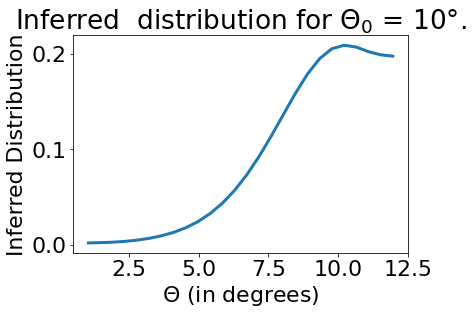

In [159]:
plt.plot(safe_value,safe_prob[0,:])
plt.title("$\Theta_0$ = " + str(round(theta0*90/np.pi))+ "degrees")

plt.title("Inferred  distribution for $\Theta_0$ = %0.2d°."%((theta0*90.)/np.pi))
plt.xlabel("$\Theta$ (in degrees)")
plt.ylabel("Inferred Distribution")

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [53]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):

    
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    

In [55]:
interact(plot_safeVal, theta0 = ((0./90.)*np.pi, (45./90.)*np.pi, 2./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta0', max=1.5707963267948966, step=…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [57]:
# safe values throughout theta

high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 32
low_rep_noise = 128
bins = 25
kappa_s = high_stim_noise
kappa_r =  high_rep_noise

type = "inverseLinearPrior"
interpolation_kind = "linear"


safe_value, safe_prob = model.safe_value_dist(theta0,kappa_s, kappa_r, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [58]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    interpolation_kind = "linear"

    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [64]:
interact(plot_riskyVal, theta1 = ((0./90.)*np.pi, (45./90.)*np.pi, 1./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta1', max=1.5707963267948966, step=…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [63]:
# risky values throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [22]:
high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

risk_rep = 1*sigma_rep


theta0 = 39*np.pi/180.0 #30.124*np.pi/180.0
theta1 = 39*np.pi/180.0 #23.8*np.pi/180.0
type = "linearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
bins = 100
sigma_stim = high_stim_noise
sigma_rep =  low_rep_noise
risk_prob = 1.0

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, risk_rep , risk_prob, type , interpolation_kind, bins)


In [23]:
# model.value_function_ori(theta0, type) #safe
model.value_function_ori(theta0, type), risk_prob*model.value_function_ori(theta1, type)

(11.666666666666671, 11.666666666666671)

Text(0.5, 1.0, '$\\Theta_0$ = 39degrees')

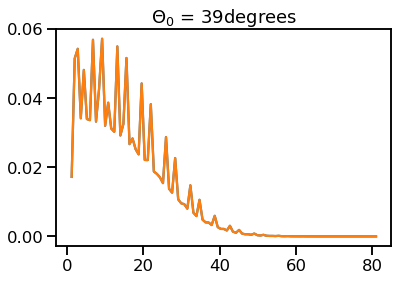

In [24]:
plt.plot(safe_value,safe_prob[0,:])
plt.plot(risky_value,risky_prob[0,:])

plt.title("$\Theta_0$ = " + str(round(theta0*180/np.pi))+ "degrees")


# kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-200)
# dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))



Text(0.5, 1.0, '$\\Theta_1$ = 39degrees')

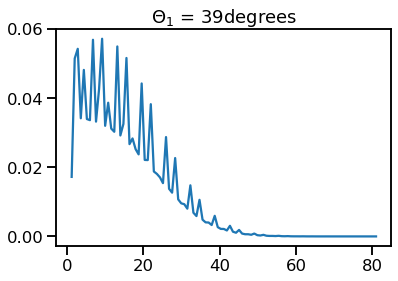

In [25]:
plt.plot(risky_value,risky_prob[0,:])
plt.title("$\Theta_1$ = " + str(round(theta1*180/np.pi))+ "degrees")

In [26]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
model.diff_dist(safe_value, safe_prob, risky_prob)

# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


array([[0.49997637]])

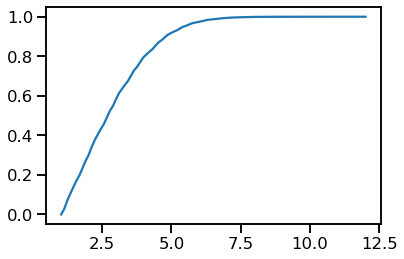

In [19]:
from scipy import integrate

p = []
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=1)

cdf2
plt.plot(safe_value, cdf2[0])
# np.shape(cdf2)

# np.shape(risky_prob)

# prob = risky_prob*cdf2
# plt.plot(safe_value, prob[0])
# # np.shape(prob)

# # p.append(prob)
# # np.shape(p)

# integrate.trapz(prob, risky_value)


In [20]:
cdf2

array([[0.        , 0.02743079, 0.06965486, 0.10496904, 0.13784823,
        0.17063855, 0.19762471, 0.2337669 , 0.26973846, 0.30001279,
        0.33986127, 0.37546976, 0.40368919, 0.43159093, 0.45613625,
        0.49016557, 0.52376988, 0.54842329, 0.5820254 , 0.61329375,
        0.63526876, 0.65667217, 0.67623425, 0.70337816, 0.72988166,
        0.74753488, 0.77162744, 0.79440186, 0.80912227, 0.82316623,
        0.83614315, 0.85377288, 0.8707502 , 0.88130545, 0.89541114,
        0.9087417 , 0.91684205, 0.92438486, 0.93131173, 0.94041976,
        0.94905765, 0.95414461, 0.9607234 , 0.96688614, 0.97044542,
        0.97367354, 0.97659427, 0.98029087, 0.9837409 , 0.98567868,
        0.98740748, 0.98895458, 0.99086576, 0.99263206, 0.99359789,
        0.99477105, 0.99584631, 0.99642406, 0.99692518, 0.99736482,
        0.99788582, 0.99835946, 0.99860746, 0.9988964 , 0.99915715,
        0.99929136, 0.99940444, 0.99950164, 0.99961206, 0.9997108 ,
        0.99976035, 0.99981568, 0.99986482, 0.99

# Linear Prior

In [67]:

high_stim_noise = 64
low_stim_noise = 10000
high_rep_noise = 64
low_rep_noise = 256


In [68]:
risk_prob = 0.75
interpolation_kind = "linear"
type = "linearPrior"

kappa_s = high_stim_noise
kappa_r = low_rep_noise

# Getting all the values from actual transformation
rangeOri = np.linspace(31.5/90., 10./90., 11)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], kappa_s, kappa_r, type, interpolation_kind, bins=1000)
# kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-100)
# dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))

# getting inferred risky values
risky_value, risky_prob = model.risky_value_dist((rangeOri), kappa_s, kappa_r, risk_prob, type, interpolation_kind, bins=1000)

# dens_risky = []
# for i in range(len(risky_prob)):
#     kde_risky = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = risky_value[:, np.newaxis], sample_weight = risky_prob[i,:]+1e-00)
#     dens_risk = np.exp(kde_risky.score_samples(risky_value[:, np.newaxis]))
#     dens_risky.append(dens_risk)
    
    
# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
# p_chose_risky = model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])


array([[0.27480172, 0.35677973, 0.44756936, 0.54175762, 0.63249719,
        0.71305205, 0.77873806, 0.82847351, 0.86518478, 0.89472726,
        0.92352774]])

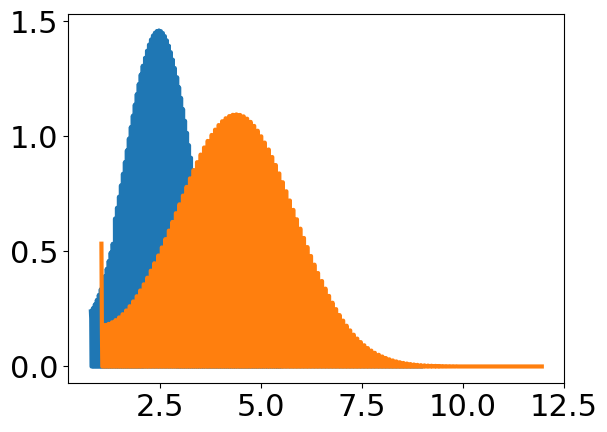

In [69]:
plt.plot(risky_value,risky_prob[0,:])
plt.plot(safe_value,safe_prob[0,:])
p_chose_risky
# np.shape(dens_risky)


In [104]:

high_stim_noise = 64
low_stim_noise = 200
high_rep_noise = 64
low_rep_noise = 200

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
# %matplotlib widget

def plot_riskAttitudes(kappa_s, kappa_r):
    risk_prob = 0.75
    type = "linearPrior"   
    interpolation_kind = "linear"
    
    # risky_stim = 0.015*1.99*np.pi - sigma_stim
    # risky_rep = 0.015 - sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(22.5/180., 13.5/180., 100)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    print(safeVal)
    print(val_range)
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred safe values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], kappa_s, kappa_r , type, interpolation_kind, bins=100)
#     kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-100)
#     dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))

    # getting inferred risky values
    risky_value, risky_prob = model.risky_value_dist((rangeOri),kappa_s, kappa_r, risk_prob, type,interpolation_kind,  bins=100)

#     dens_risky = []
#     for i in range(len(risky_prob)):
#         kde_risky = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = risky_value[:, np.newaxis], sample_weight = risky_prob[i,:]+1e-100)
#         dens_risk = np.exp(kde_risky.score_samples(risky_value[:, np.newaxis]))
#         dens_risky.append(dens_risk)


    # Risk attitudes 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     p_chose_risky = model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])


    # The value of the safe option
    plt.axvline(safeVal, c='r')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)


In [105]:
interact(plot_riskAttitudes, kappa_s = (high_stim_noise, low_stim_noise, 10), kappa_r = (high_rep_noise, low_rep_noise, 10))


interactive(children=(IntSlider(value=124, description='kappa_s', max=200, min=64, step=10), IntSlider(value=1…

<function __main__.plot_riskAttitudes(kappa_s, kappa_r)>

In [67]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
    interpolation_kind = "linear"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [45]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (0.001, 0.014, 0.002))



interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [46]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
    interpolation_kind = "linear"

    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type,interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [47]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.0069814915409025175, description='sigma_stim', max=0.017453292519943…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

# Inverse Linear Prior

In [48]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001

medium_rep_noise = 0.02




In [49]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior" 
    interpolation_kind = "linear"
    

    # Getting all the values from actual transformation
    rangeOri = np.linspace(22.5/180., 33.5/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [50]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.002*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))



interactive(children=(FloatSlider(value=0.04376238566450582, description='sigma_stim', max=0.08752477132901164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [120]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [121]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [122]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [123]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [124]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(83./180., 87./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(77./180., 83./180., 7)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(65./180., 77./180., 13)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(48./180., 65./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [125]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00000001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.006981317182510244, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [31]:
# Inverse Linear Prior

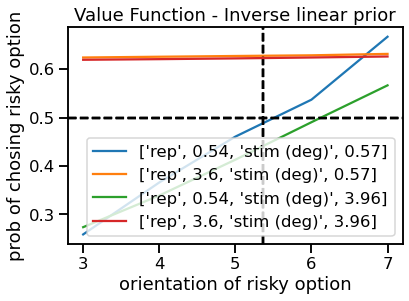

In [187]:
rangeInverseLinear1 = np.linspace(3./180., 7./180., 5)*np.pi
rangeInverseLinear2 = np.linspace(7./180., 14./180., 8)*np.pi
rangeInverseLinear3 = np.linspace(14./180., 26./180., 12)*np.pi
rangeInverseLinear4 = np.linspace(26./180., 43./180., 18)*np.pi

rangeOri = rangeInverseLinear1

sigma_stim_list = [0.001*np.pi,0.007*np.pi]
sigma_rep_list = [0.003, 0.02]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:
        
        sigma_risk_rep = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_risk_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep*180., "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")
    
    

In [ ]:
# Prior

In [ ]:
rangePrior1 = np.linspace(54./180., 61./180., 8)*np.pi
rangePrior2 = np.linspace(61./180., 68./180., 8)*np.pi
rangePrior3 = np.linspace(68./180., 78./180., 11)*np.pi
rangePrior4 = np.linspace(78./180., 88./180., 11)*np.pi

rangeOri = rangePrior1

sigma_stim_list = {"low_stim" : 0.001*np.pi, "high_stim" : 0.014*np.pi}
sigma_rep_list = {"low_rep":0.001, "high_rep":0.014}
risk_prob = 0.75
type = "prior"

i = -1
for sigma_stim in sigma_stim_list:
    i = i+1
    j = -1
    for sigma_rep in sigma_rep_safe_list:
        
        j= j+1
        
        # Now different sigma for risk and safe representation possible
        sigma_risk = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]] , type, bins=1000)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim_list[list(sigma_stim_list.keys())[i]], sigma_rep_list[list(sigma_rep_list.keys())[j]], risk_prob, type, bins=1000) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=[list(sigma_stim_list.keys())[i], list(sigma_rep_list.keys())[j]])
        plt.legend(bbox_to_anchor=(1., 1.0))
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
    
    

In [ ]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

In [ ]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"

    rangeOri = np.linspace(54./180., 61./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(61./180., 68./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(68./180., 78./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(78./180., 88./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - prior")

In [ ]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))